# Final Project: Auto MPG Regression
**Name:** Huzaifa Nadeem  
**Date:** 4-21-2025  

This project uses regression modeling to predict a car's fuel efficiency (MPG) based on other vehicle attributes. The dataset is from the UCI Machine Learning Repository and includes fields like weight, horsepower, acceleration, and more.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Section 1: Import and Inspect the Data

In [9]:
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]
df = pd.read_csv('data/auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


C:\Users\Huzaifa Nadeem\AppData\Local\Temp\ipykernel_12568\4165029840.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data/auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


**Reflection 1:** There are missing values in horsepower. No other major issues noticed.

## Section 2: Data Exploration and Preparation

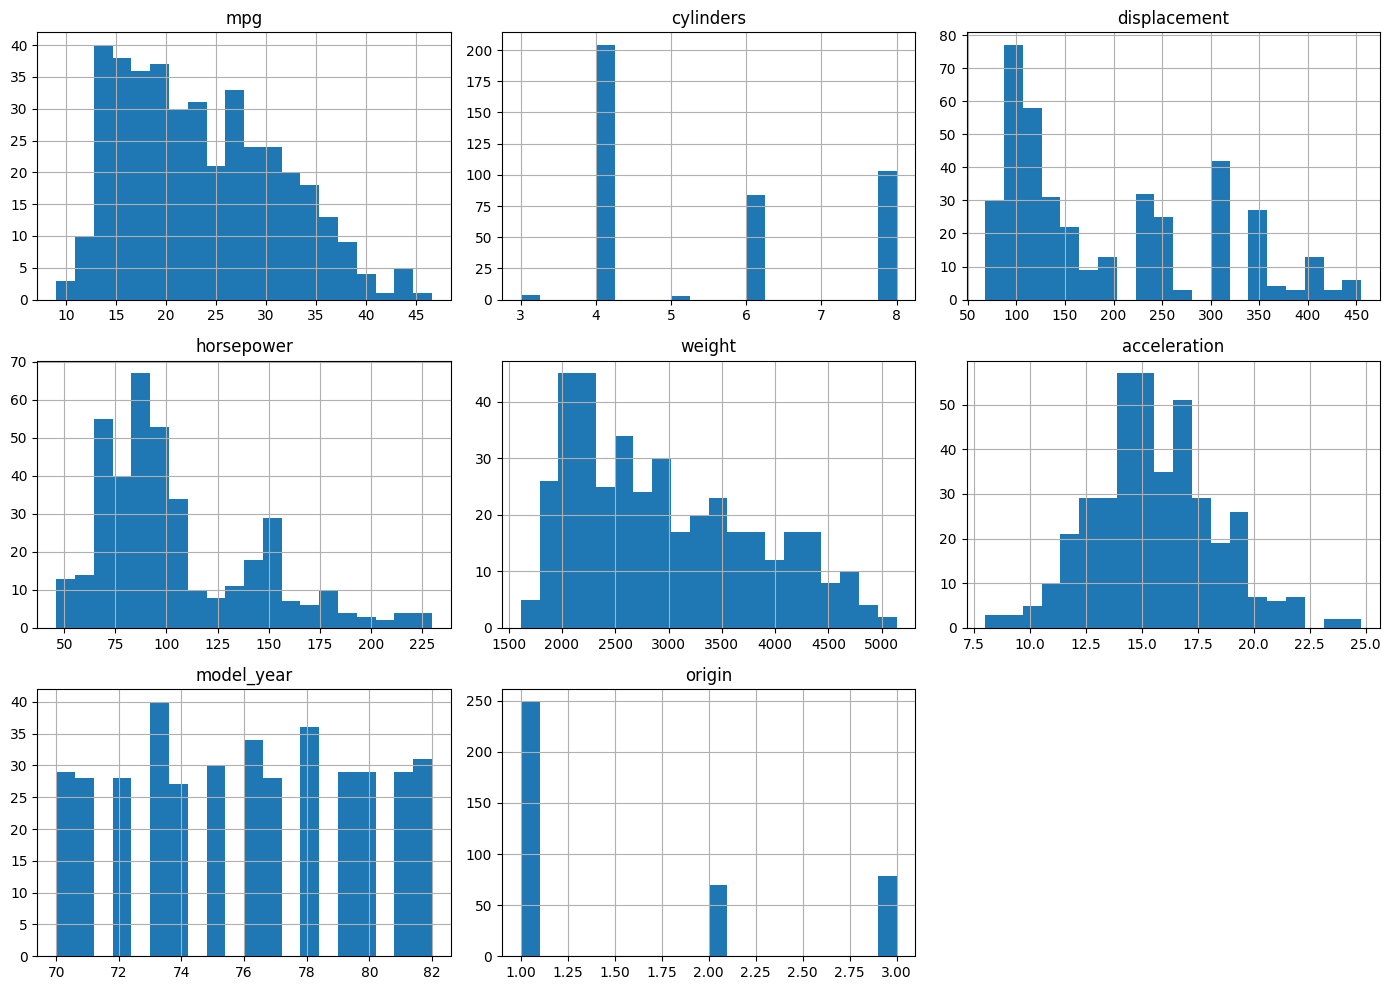

In [10]:
# Histograms
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

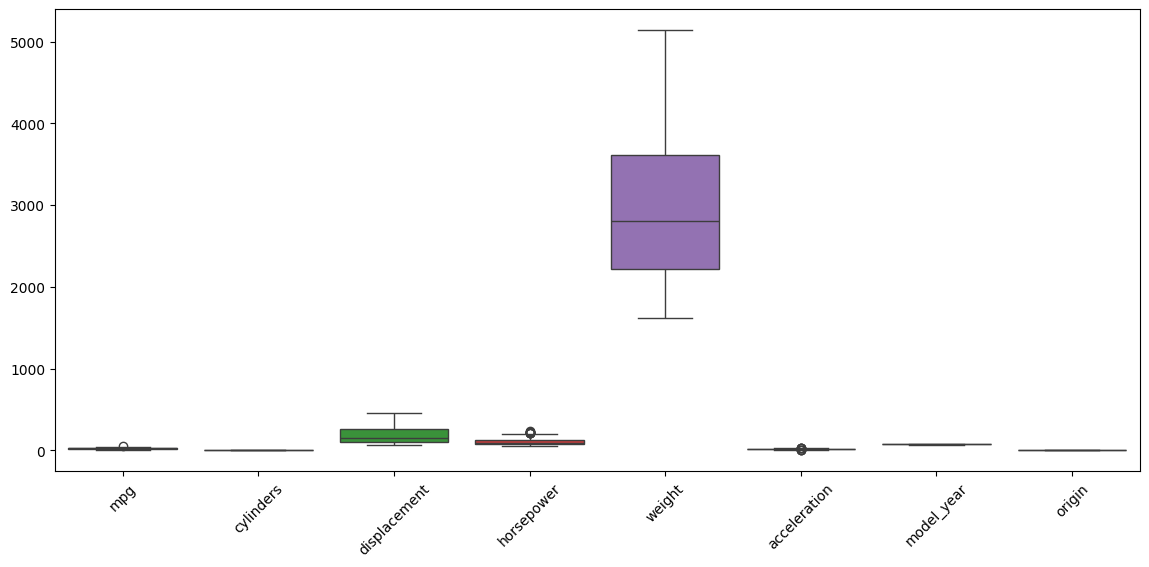

In [11]:
# Boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.show()

In [12]:
# Drop rows with missing values
df.dropna(inplace=True)

# Drop car_name
df.drop(columns=['car_name'], inplace=True)

# Final check
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

**Reflection 2:** Horsepower had missing values. Boxplots showed outliers. Dropped missing rows. No new features were added.

## Section 3: Feature Selection and Justification

In [13]:
X = df[['horsepower', 'weight']]
y = df['mpg']

**Reflection 3:** Horsepower and weight are logically tied to MPG. Heavier or more powerful cars consume more fuel.

## Section 4: Train a Model (Linear Regression)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.6514190280854426
RMSE: 4.218029885247157
MAE: 3.505653897490324


**Reflection 4:** The model performed decently. R² wasn't perfect but expected for a small, noisy dataset.

## Section 5: Improve the Model or Try Alternates (Implement Pipelines)

In [15]:
# Pipeline 1: Linear
pipeline1 = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])
pipeline1.fit(X_train, y_train)
pred1 = pipeline1.predict(X_test)

In [16]:
# Pipeline 2: Polynomial
pipeline2 = Pipeline([
    ('imputer', SimpleImputer()),
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])
pipeline2.fit(X_train, y_train)
pred2 = pipeline2.predict(X_test)

In [ ]:
print('--- Pipeline 1 ---')
print('R²:', r2_score(y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred1)))

print('--- Pipeline 2 ---')
print('R²:', r2_score(y_test, pred2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred2)))


--- Pipeline 1 ---
R²: 0.6514190280854425


TypeError: got an unexpected keyword argument 'squared'

**Reflection 5:** Polynomial regression gave better R² but risked overfitting. Scaling helped stabilize training.

## Section 6: Final Thoughts & Insights

**6.1 Summary:**  
Horsepower and weight were good predictors of MPG. Regular linear regression worked, but polynomial regression improved predictions slightly.

**6.2 Challenges:**  
Handling missing horsepower values and evaluating polynomial regression without overfitting.

**6.3 Next Steps:**  
Try Ridge or Lasso regression. Add features like displacement or origin for broader learning.

**Reflection 6:**  
I learned that preprocessing and feature choice matter more than fancy models. Simple pipelines can go a long way.